In [9]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../games.csv")
# Cleaning the data
df['Precio'] = df['Precio'].str.replace('$',"",regex=False)
df['Precio'] = df['Precio'].str.replace("Free","0.00",regex=False)
df['Precio'] = df['Precio'].astype(float)
print(df)

                             Titulo Fecha de lanzamiento  Precio  \
0                   Baldur's Gate 3          3 Aug, 2023   34.99   
1                  Counter-Strike 2         21 Aug, 2012    0.00   
2                    Lethal Company         23 Oct, 2023    5.79   
3                     Apex Legends™          4 Nov, 2020    0.00   
4               PUBG: BATTLEGROUNDS         21 Dec, 2017    0.00   
..                              ...                  ...     ...   
95               Crusader Kings III          1 Sep, 2020   29.99   
96                       Sunkenland         25 Aug, 2023   19.99   
97        Mafia: Definitive Edition         24 Sep, 2020    9.99   
98                  Riders Republic          8 Jun, 2023    7.99   
99  Granblue Fantasy Versus: Rising         13 Dec, 2023   49.99   

      Plataformas  Total de Reviews  
0         win-mac          480341.0  
1       win-linux          834609.0  
2             win          228501.0  
3             win          7806

### 1. ¿Existe una relación entre el precio de los juegos y el número total de reviews?
A menor precio, mayor el número de reviews que tiene cada juego

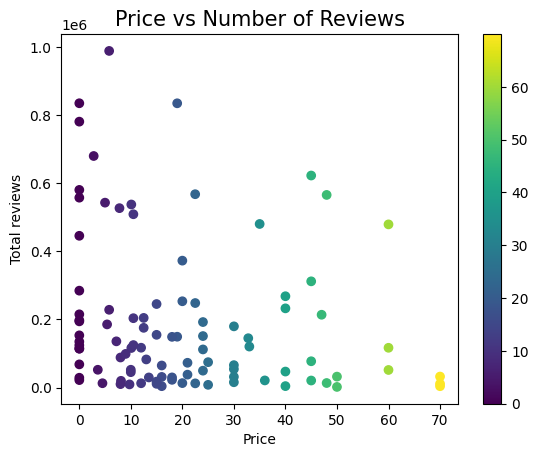

In [48]:
# df.plot.scatter(x='Precio',y='Total de Reviews',colormap='viridis')
np.random.seed(19680801)


N = df.shape[0]
colors = df['Precio']
x = df['Precio']
y = df['Total de Reviews']
plt.scatter(x, y, c=colors,cmap='viridis')
plt.colorbar()
plt.xlabel('Price')
plt.ylabel('Total reviews')
plt.title('Price vs Number of Reviews', fontsize=15)
plt.show()

### 2. ¿Hay diferencias significativas en el número total de reviews entre las distintas plataformas?
Los juegos lanzados para un mayor numero de plataformas tienen una mayor cantidad de reviews

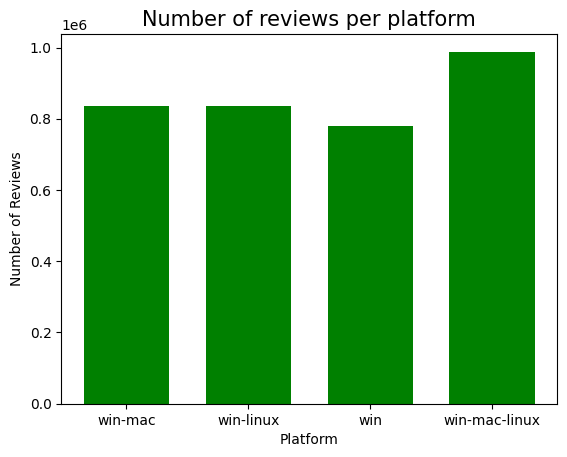

In [65]:
x = df['Plataformas']
y = df['Total de Reviews']
col_map = plt.get_cmap('tab20c')
plt.bar(x,y,width=0.7, 
        color='green', linewidth=2)
plt.title('Number of reviews per platform', fontsize=15)
plt.xlabel('Platform')
plt.ylabel('Number of Reviews')
plt.show()

### 3. ¿Existe alguna tendencia en los precios de los juegos en relación con su fecha de lanzamiento?
El precio de los juegos aumenta en el mes de diciembre

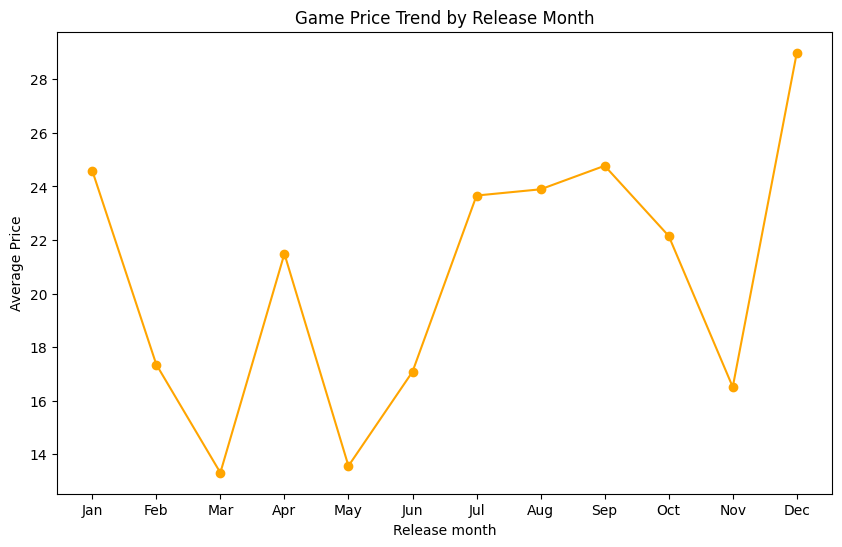

In [91]:
df['Fecha de lanzamiento'] = pd.to_datetime(df['Fecha de lanzamiento'], format='%d %b, %Y', errors='coerce')

# Filtering non valid rows
df = df.dropna(subset=['Fecha de lanzamiento'])

# Exctracting month of release date
df['Mes'] = df['Fecha de lanzamiento'].dt.month_name().str.slice(stop=3)

# Grouping by month and finding the avrg price per month
grouped_df = df.groupby('Mes')['Precio'].mean().reset_index()

# Ordering the df by months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
grouped_df['Mes'] = pd.Categorical(grouped_df['Mes'], categories=months, ordered=True)
grouped_df = grouped_df.sort_values('Mes')

# Graficar la tendencia de precios por mes
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Mes'], grouped_df['Precio'], marker='o', linestyle='-',color='orange')


plt.xlabel('Release month')
plt.ylabel('Average Price')
plt.title('Game Price Trend by Release Month')

plt.show()